**Importing all Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score

**Sample Data Creation**

In [ ]:
X, _ = make_moons(
    n_samples=500,
    noise=0.05,
    random_state=42
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**DB_Scan Model Import and Fitting**

In [ ]:
dbscan = DBSCAN(
    eps=0.3,
    min_samples=5
)

labels = dbscan.fit_predict(X_scaled)

**Visualizations**

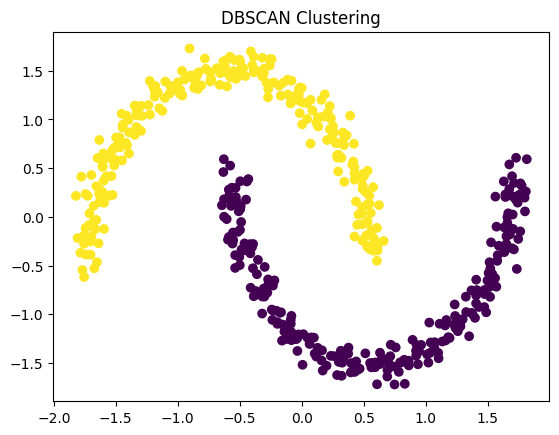

In [ ]:
plt.scatter(
    X_scaled[:,0],
    X_scaled[:,1],
    c=labels,
    cmap='viridis'
)
plt.title("DBSCAN Clustering")
plt.show()

**Fitting KNN Algorithms**

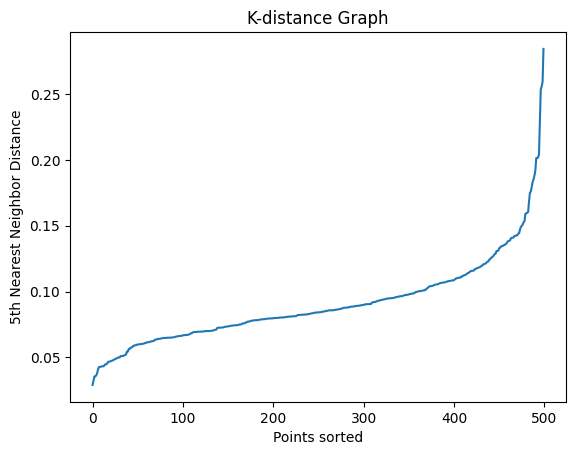

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4])

plt.plot(distances)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Points sorted")
plt.title("K-distance Graph")
plt.show()

In [ ]:
# Remove noise points
mask = labels != -1

if len(set(labels[mask])) > 1:
    sil = silhouette_score(X_scaled[mask], labels[mask])
    print("Silhouette Score (no noise):", sil)
else:
    print("Not enough clusters for silhouette")

Silhouette Score (no noise): 0.3893383378360491
